# TensorFlow Classification Basics

* Early stopping: Keras can automatically stop training based on a loss condition passed into the model.fit() call
* Dropout layers: Each dropout layer will drop a user defined percentage of neurons in the previous layer every batch (without affecting their weights).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get data

In [2]:
df = pd.read_csv('files/cancer_classification.csv')
df.info() # 569 tumors with 30 features and a target class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isnull().mean() # no missing values 

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
benign_0__mal_1            0.0
dtype: float64

In [5]:
df.describe().transpose() # will need to scale features

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA 

#### Distribution of benign and malignant tumors 

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

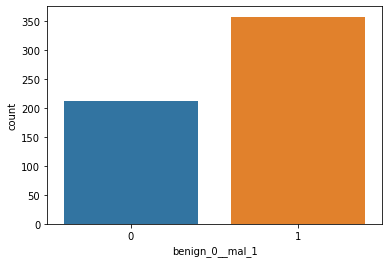

In [6]:
sns.countplot(x = 'benign_0__mal_1', data = df)

#### Correlations of features to target

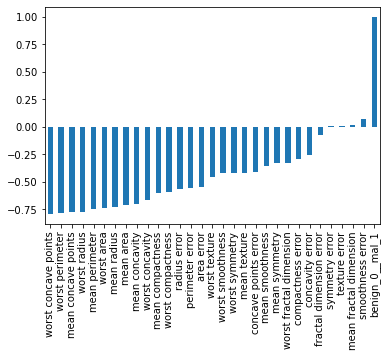

In [7]:
# many features highly negatively correlated with target, should be good classification 
x=df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Figure size 1440x1296 with 0 Axes>

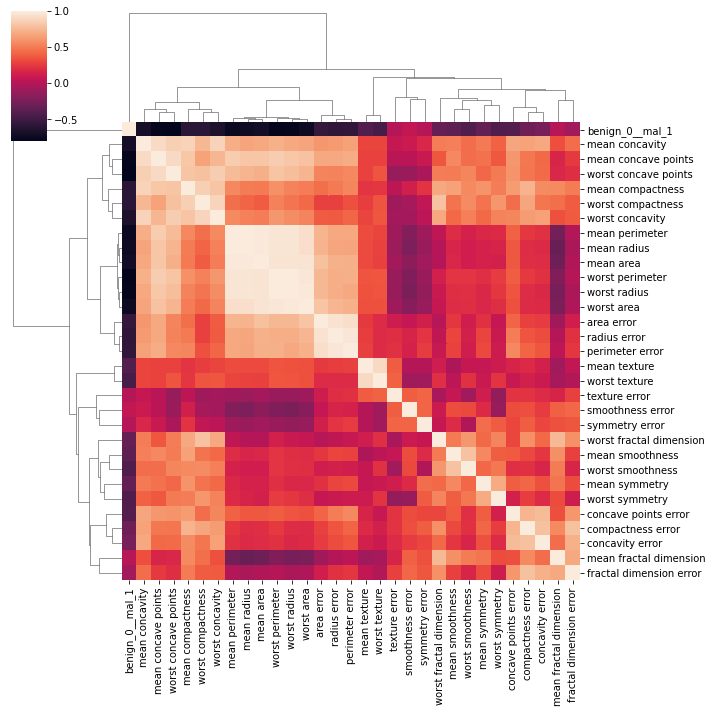

In [8]:
# concavity and compactness
# perimeter, radius, area
# texture, smoothness, symmetry
plt.figure(figsize=(20,18))
sns.clustermap(df.corr())

## Data Preprocessing 

#### Split into train and test

In [9]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25)

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25)

#### Scale features

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_valid = scaler.transform(X_valid)

In [17]:
X_test = scaler.transform(X_test)

## Modelling

#### Build model

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense

In [20]:
X_train.shape # 30 features, so 30 neurons in input layer 

(319, 30)

In [21]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid')) # use sigmoid for binary classification

#### Compile model

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam') # use cross entropy for classification

#### Fit model to training data

In [23]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_valid, y_valid))

Epoch 1/600
10/10 [==============================] - 0s 11ms/step - loss: 0.6901 - val_loss: 0.6585
Epoch 2/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6568 - val_loss: 0.6296
Epoch 3/600
10/10 [==============================] - 0s 3ms/step - loss: 0.6234 - val_loss: 0.5944
Epoch 4/600
10/10 [==============================] - 0s 2ms/step - loss: 0.5927 - val_loss: 0.5603
Epoch 5/600
10/10 [==============================] - 0s 2ms/step - loss: 0.5614 - val_loss: 0.5266
Epoch 6/600
10/10 [==============================] - 0s 2ms/step - loss: 0.5314 - val_loss: 0.4906
Epoch 7/600
10/10 [==============================] - 0s 2ms/step - loss: 0.4986 - val_loss: 0.4588
Epoch 8/600
10/10 [==============================] - 0s 2ms/step - loss: 0.4685 - val_loss: 0.4303
Epoch 9/600
10/10 [==============================] - 0s 2ms/step - loss: 0.4355 - val_loss: 0.3937
Epoch 10/600
10/10 [==============================] - 0s 2ms/step - loss: 0.4044 - val_loss: 0.3648
Epoch 11

10/10 [==============================] - 0s 2ms/step - loss: 0.0516 - val_loss: 0.1213
Epoch 84/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.1252
Epoch 85/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.1260
Epoch 86/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1254
Epoch 87/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0496 - val_loss: 0.1331
Epoch 88/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1224
Epoch 89/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.1331
Epoch 90/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0494 - val_loss: 0.1265
Epoch 91/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1241
Epoch 92/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0495 - val_loss: 0.1367
Epoch 93/600


10/10 [==============================] - 0s 2ms/step - loss: 0.0327 - val_loss: 0.1603
Epoch 165/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0300 - val_loss: 0.1494
Epoch 166/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0308 - val_loss: 0.1652
Epoch 167/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0302 - val_loss: 0.1541
Epoch 168/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.1703
Epoch 169/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0307 - val_loss: 0.1593
Epoch 170/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0300 - val_loss: 0.1598
Epoch 171/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.1775
Epoch 172/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0302 - val_loss: 0.1519
Epoch 173/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 0.1714
Epoc

10/10 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.1904
Epoch 246/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.1882
Epoch 247/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.1834
Epoch 248/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.1899
Epoch 249/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.1773
Epoch 250/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0215 - val_loss: 0.1914
Epoch 251/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.1908
Epoch 252/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.1927
Epoch 253/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0202 - val_loss: 0.1853
Epoch 254/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.1960
Epoc

10/10 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.2088
Epoch 327/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.1945
Epoch 328/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.1957
Epoch 329/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.2338
Epoch 330/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.1840
Epoch 331/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.2144
Epoch 332/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.2101
Epoch 333/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.1957
Epoch 334/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.2169
Epoch 335/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.2214
Epoc

10/10 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.1934
Epoch 408/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.2393
Epoch 409/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.2117
Epoch 410/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.2067
Epoch 411/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.2682
Epoch 412/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0193 - val_loss: 0.1772
Epoch 413/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 0.2564
Epoch 414/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.1931
Epoch 415/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.2262
Epoch 416/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.2453
Epoc

10/10 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.2268
Epoch 489/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.2275
Epoch 490/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.2440
Epoch 491/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.2230
Epoch 492/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.2272
Epoch 493/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.2293
Epoch 494/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.2320
Epoch 495/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.2195
Epoch 496/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.2404
Epoch 497/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.2262
Epoc

10/10 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.2529
Epoch 569/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.2517
Epoch 570/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.2556
Epoch 571/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.2421
Epoch 572/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.2708
Epoch 573/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.2465
Epoch 574/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.2487
Epoch 575/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.2601
Epoch 576/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.2515
Epoch 577/600
10/10 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.2574
Epoc

#### Get training history

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,val_loss
0,0.690060,0.658543
1,0.656796,0.629576
2,0.623430,0.594370
3,0.592678,0.560286
4,0.561431,0.526644
...,...,...
595,0.005007,0.254974
596,0.004529,0.262963
597,0.004083,0.261667
598,0.003995,0.262207


<AxesSubplot:>

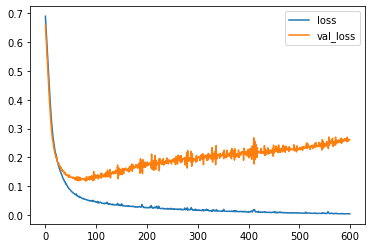

In [25]:
loss_df.plot() # overfitting after 100 epochs

#### Early stopping

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min') # minimize validation loss, stop when it starts to increase (tolerance of 20 epochs)

In [29]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(X_train, y_train, epochs = 600, validation_data = (X_valid, y_valid), callbacks = [early_stop]) # add early stopping

Epoch 1/600
10/10 [==============================] - 0s 9ms/step - loss: 0.6833 - val_loss: 0.6572
Epoch 2/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6595 - val_loss: 0.6375
Epoch 3/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6346 - val_loss: 0.6104
Epoch 4/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6096 - val_loss: 0.5869
Epoch 5/600
10/10 [==============================] - 0s 2ms/step - loss: 0.5842 - val_loss: 0.5564
Epoch 6/600
10/10 [==============================] - 0s 2ms/step - loss: 0.5556 - val_loss: 0.5244
Epoch 7/600
10/10 [==============================] - 0s 2ms/step - loss: 0.5271 - val_loss: 0.4894
Epoch 8/600
10/10 [==============================] - 0s 2ms/step - loss: 0.4954 - val_loss: 0.4607
Epoch 9/600
10/10 [==============================] - 0s 2ms/step - loss: 0.4584 - val_loss: 0.4185
Epoch 10/600
10/10 [==============================] - 0s 2ms/step - loss: 0.4159 - val_loss: 0.3751
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.0468 - val_loss: 0.1458
Epoch 00083: early stopping


<AxesSubplot:>

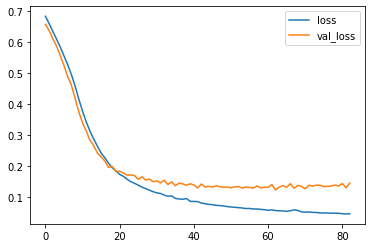

In [30]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() # no overfitting

#### Dropout layers

In [31]:
from tensorflow.keras.layers import Dropout # import dropout layers

In [32]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.4)) # randomly turn off 40% neurons in this layer every batch

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.4))  # randomly turn off 40% neurons in this layer every batch

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


# model now has dropouts and early stopping
model.fit(X_train, y_train, epochs = 600, validation_data = (X_valid, y_valid), callbacks = [early_stop]) 

Epoch 1/600
10/10 [==============================] - 0s 9ms/step - loss: 0.7193 - val_loss: 0.6832
Epoch 2/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6985 - val_loss: 0.6685
Epoch 3/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6783 - val_loss: 0.6562
Epoch 4/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6731 - val_loss: 0.6407
Epoch 5/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6434 - val_loss: 0.6245
Epoch 6/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6412 - val_loss: 0.6095
Epoch 7/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6278 - val_loss: 0.5897
Epoch 8/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6012 - val_loss: 0.5696
Epoch 9/600
10/10 [==============================] - 0s 2ms/step - loss: 0.6025 - val_loss: 0.5491
Epoch 10/600
10/10 [==============================] - 0s 2ms/step - loss: 0.5741 - val_loss: 0.5285
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.1153 - val_loss: 0.1214
Epoch 84/600
10/10 [==============================] - 0s 2ms/step - loss: 0.1250 - val_loss: 0.1359
Epoch 85/600
10/10 [==============================] - 0s 2ms/step - loss: 0.1349 - val_loss: 0.1304
Epoch 86/600
10/10 [==============================] - 0s 2ms/step - loss: 0.1383 - val_loss: 0.1187
Epoch 87/600
10/10 [==============================] - 0s 2ms/step - loss: 0.1235 - val_loss: 0.1185
Epoch 88/600
10/10 [==============================] - 0s 2ms/step - loss: 0.1110 - val_loss: 0.1146
Epoch 89/600
10/10 [==============================] - 0s 2ms/step - loss: 0.1351 - val_loss: 0.1225
Epoch 90/600
10/10 [==============================] - 0s 2ms/step - loss: 0.1006 - val_loss: 0.1204
Epoch 91/600
10/10 [==============================] - 0s 2ms/step - loss: 0.1122 - val_loss: 0.1169
Epoch 92/600
10/10 [==============================] - 0s 2ms/step - loss: 0.1059 - val_loss: 0.1182
Epoch 93/600


<AxesSubplot:>

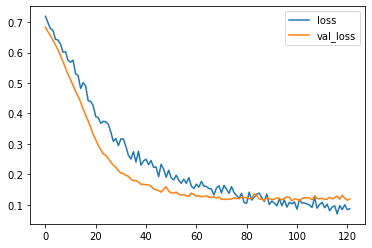

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() # no overfitting

#### Make predictions

In [34]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


#### Evaluate model performance

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

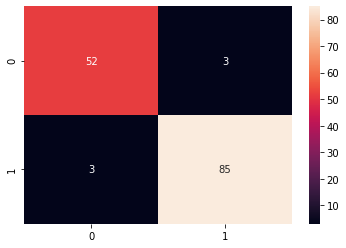

In [36]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [37]:
# 96% 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

